In [1]:
# General data handling/io
import datetime
import pandas as pd
import numpy as np
import pickle

# Viz libs
import matplotlib.pyplot as plt 

# ML libs
from sklearn.model_selection import train_test_split
from sklearn import metrics                                   

# Models
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  BayesianRidge)

from sklearn.ensemble import (GradientBoostingRegressor,
                              RandomForestRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


# Feature Selection
from sklearn.feature_selection import RFE

# Turning off future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
def base_data():
    
    return pd.read_csv('processed_data.csv')

In [3]:
def select_features(df):
    
    features = [f for f in df.columns if f != 'price']
    
    X = df[features]
    Y = df['price'].values
    
    return X, Y

In [4]:
def feature_select_recursive(X, Y, model, name):
        
    rfe = RFE(model)
    
    rfe = rfe.fit(X, Y)
    
    cols = list(X.columns)
    features = pd.Series(rfe.support_,index = cols)
    
    selected_features_rfe = features[features==True].index.tolist()
    
    print('\n')
    print('Selected Features for:', name)
    print(selected_features_rfe)
    print('\n')

    return selected_features_rfe

In [5]:
def residual_plot(y_pred, residuals):
    
    plt.scatter(y_pred, residuals)
    plt.title("residual plot")
    plt.xlabel("price")
    plt.ylabel("residuals")
    plt.axhline(0, color='red')
    plt.show()

In [6]:
def model_selection():
    
    df = base_data()
    
    models = list()
    
    # Try these models first
    models.append(('GBR', GradientBoostingRegressor())) 
    models.append(('RFR',RandomForestRegressor(n_jobs=-1))) 
    models.append(('MLR', LinearRegression()))
    models.append(('Ridge', Ridge()))
    models.append(('Bayes Ridge', BayesianRidge()))
    models.append(('KNN',KNeighborsRegressor()))
    models.append(('Decision Tree',DecisionTreeRegressor(max_depth=1)))
    models.append(('SVM',SVR()))
    
    for name, model in models:
        
        print('\n{}'.format(name))
        print('------------------------------------------------------')
        print('------------------------------------------------------')
        
        # Split out X, Y
        
        X,Y = select_features(df)
        
        if name not in ['KNN','SVM']:
            
            features = feature_select_recursive(X, Y, model, name)
        
            # Apply the feature selection
            X = X[features]
        
        # Break out train and test sets (using 80% train 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
        
        # Fit the model to the training split
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
                
        print('Regression Metrics:')
        scores = {
        'mean_squared_error':metrics.mean_squared_error(y_test, y_pred).round(2),
        'root_mean_squared_error': np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2),
        'mean_absolute_error':metrics.mean_absolute_error(y_test, y_pred).round(2),
        'explained_variance_score':metrics.explained_variance_score(y_test, y_pred).round(2),
        'r2_score':metrics.explained_variance_score(y_test, y_pred).round(2)
        }
        
        for metric, score in scores.items():
            print(metric+':', score)
        
        residuals = y_test-y_pred
        
        residual_plot(y_pred, residuals)
        
        
        print('\nWriting out {} to disk'.format(name))
        filename = 'models/{}.sav'.format(name)
        pickle.dump(model, open(filename, 'wb'))
        
        print('\n------------------------------------------------------')
        


GBR
------------------------------------------------------
------------------------------------------------------


Selected Features for: GBR
['nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat']


Regression Metrics:
mean_squared_error: 8.17
root_mean_squared_error: 2.86
mean_absolute_error: 2.14
explained_variance_score: 0.87
r2_score: 0.87


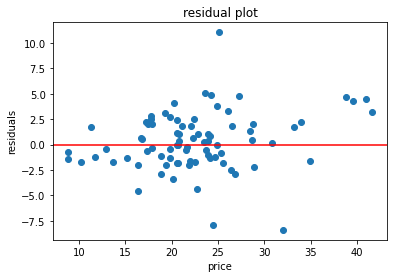


Writing out GBR to disk

------------------------------------------------------

RFR
------------------------------------------------------
------------------------------------------------------


Selected Features for: RFR
['crim', 'rm', 'age', 'dis', 'tax', 'lstat']


Regression Metrics:
mean_squared_error: 9.37
root_mean_squared_error: 3.06
mean_absolute_error: 2.25
explained_variance_score: 0.85
r2_score: 0.85


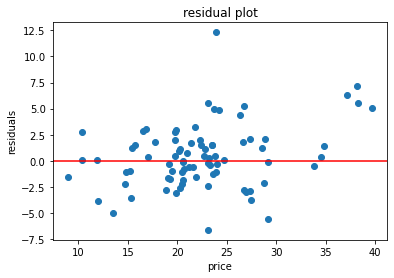


Writing out RFR to disk

------------------------------------------------------

MLR
------------------------------------------------------
------------------------------------------------------


Selected Features for: MLR
['nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat']


Regression Metrics:
mean_squared_error: 11.63
root_mean_squared_error: 3.41
mean_absolute_error: 2.49
explained_variance_score: 0.81
r2_score: 0.81


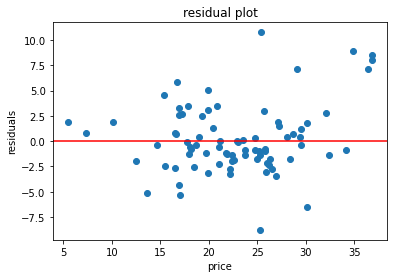


Writing out MLR to disk

------------------------------------------------------

Ridge
------------------------------------------------------
------------------------------------------------------


Selected Features for: Ridge
['nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat']


Regression Metrics:
mean_squared_error: 11.66
root_mean_squared_error: 3.42
mean_absolute_error: 2.49
explained_variance_score: 0.81
r2_score: 0.81


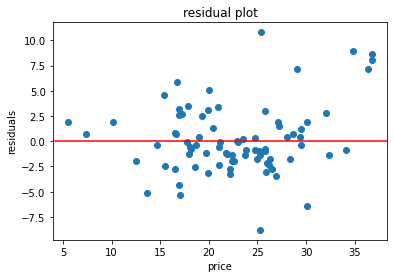


Writing out Ridge to disk

------------------------------------------------------

Bayes Ridge
------------------------------------------------------
------------------------------------------------------


Selected Features for: Bayes Ridge
['rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']


Regression Metrics:
mean_squared_error: 11.62
root_mean_squared_error: 3.41
mean_absolute_error: 2.57
explained_variance_score: 0.81
r2_score: 0.81


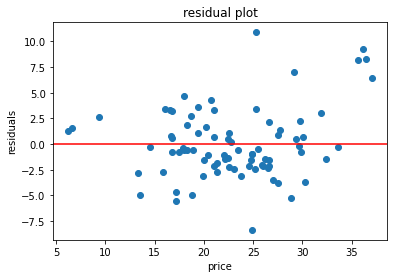


Writing out Bayes Ridge to disk

------------------------------------------------------

KNN
------------------------------------------------------
------------------------------------------------------
Regression Metrics:
mean_squared_error: 12.8
root_mean_squared_error: 3.58
mean_absolute_error: 2.5
explained_variance_score: 0.79
r2_score: 0.79


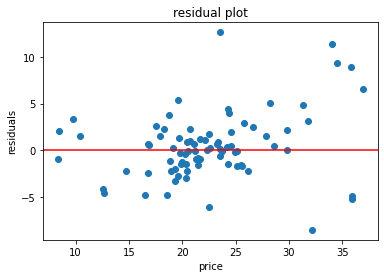


Writing out KNN to disk

------------------------------------------------------

Decision Tree
------------------------------------------------------
------------------------------------------------------


Selected Features for: Decision Tree
['rm', 'rad', 'tax', 'ptratio', 'popul', 'lstat']


Regression Metrics:
mean_squared_error: 37.71
root_mean_squared_error: 6.14
mean_absolute_error: 4.8
explained_variance_score: 0.43
r2_score: 0.43


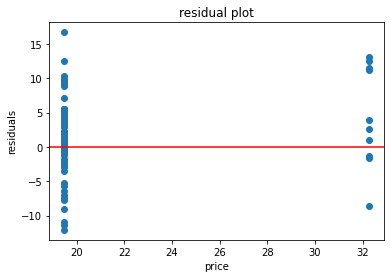


Writing out Decision Tree to disk

------------------------------------------------------

SVM
------------------------------------------------------
------------------------------------------------------
Regression Metrics:
mean_squared_error: 17.65
root_mean_squared_error: 4.2
mean_absolute_error: 2.69
explained_variance_score: 0.72
r2_score: 0.72


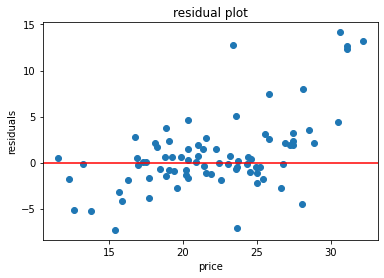


Writing out SVM to disk

------------------------------------------------------


In [7]:
model_selection()